<h1> Extracting Stock Data Using A Python Library </h1>

In [111]:
import yfinance as yf
import pandas as pd

## Using the ufinance Library to Extract Stock Data


In [112]:
# Ticker module we can create an object that will allow us to acccess functions to extract data
apple = yf.Ticker("AAPL")

In [113]:
import json
with open("/Users/chriz_yu/Documents/Datasets/apple.json") as json_file:
    apple_info = json.load(json_file)
    print("Type:", type(apple_info))
apple_info

Type: <class 'dict'>


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [114]:
apple_share_price_data = apple.history(period = "max")
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0


In [115]:
# reset index of the DF
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

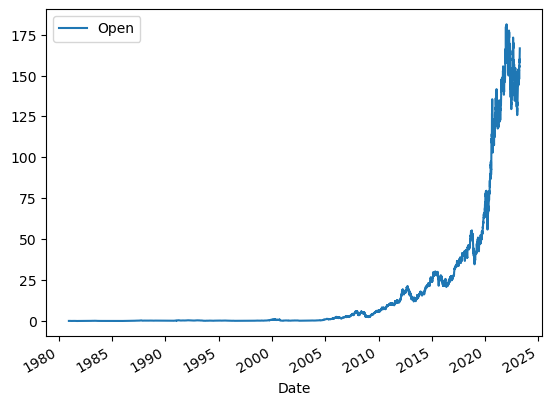

In [116]:
apple_share_price_data.plot(x="Date", y="Open")

In [117]:
# dividends are the distribution of a companys profits to shareholders
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64

<Axes: xlabel='Date'>

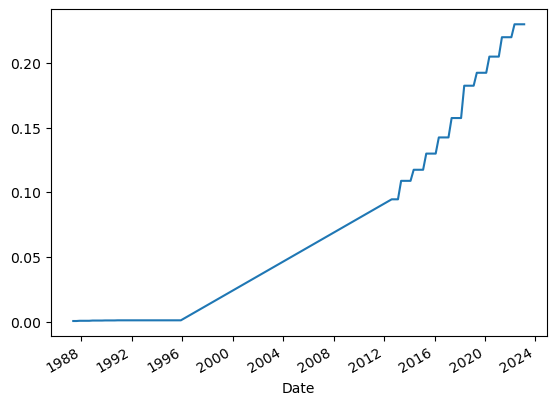

In [118]:
apple.dividends.plot()

In [119]:
# AMD (advanced Micro Devices)
amd = yf.Ticker("AMD")

In [120]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<Axes: xlabel='Date'>

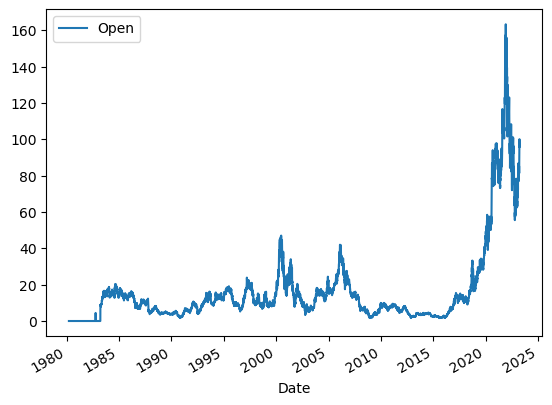

In [121]:
amd_share_price_data.plot(x="Date", y="Open")

# Extracting Stock Data Using a Web Scraping

In [122]:
from bs4 import  BeautifulSoup
import requests

In [123]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/\
IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

In [124]:
# we must parse the text into html using `beautiful_soup`
soup = BeautifulSoup(data, 'html5lib')

In [125]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    dat = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    netflix_data = netflix_data.append(\
        {"Date":dat, "Open":Open, \
        "High":high, "Low":low, \
        "Close":close, "Adj Close":adj_close, \
        "Volume":volume}, ignore_index=True)


/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3686528181.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append(\
/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3686528181.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append(\
/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3686528181.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append(\
/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3686528181.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = ne

In [126]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [127]:
read_html_pandas_data = pd.read_html(url)
# or
read_html_pandas_data = pd.read_html(str(soup))

In [128]:
# beacause there is only one table on the page, just take the first table in the list returned
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [129]:
# Amazon
url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'

data = requests.get(url).text

In [130]:
soup = BeautifulSoup(data, 'html5lib')
read_html_pandas_data = pd.read_html(str(soup))

In [131]:
for title in soup.find_all('title'):
    print(title.get_text())

Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


In [132]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].textE
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3560422532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3560422532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
/var/folders/18/c9kzcmsn4n7cwfpxcggy6xkw0000gn/T/ipykernel_26064/3560422532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.ap

In [133]:
amazon_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
56,"May 01, 2016",663.92,724.23,656.00,None,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,None,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,None,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,None,"124,144,800",552.52
60,"Jan 01, 2016",656.29,657.72,547.18,None,"130,200,900",587.00
